# Lab. 8 - K-Means and the LLoyd algorithm

In this lab we consider the problem of **unsupervised learning**, through one of the most famous **clustering** algorithms: K-means.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

In [39]:
def _check_random_generator(rng):
    """Convert rng into a np.random.Generator instance."""
    if rng is None:
        print("⚠️  Warning: Set the `rng` parameter to a NumPy random generator\n"
              "   (e.g. `np.random.default_rng(42)`) or specify a fixed seed to ensure\n"
              "   your results are reproducible. Proceeding with a random seed for now.")
        return np.random.default_rng()
    if isinstance(rng, np.random.Generator):
        return rng
    if isinstance(rng, (int, np.integer)):
        return np.random.default_rng(rng)


random_seed = 42
rng = np.random.default_rng(random_seed)

In [40]:
def mixGauss(means, sigmas, n, rng=None):
    """
    means : 2D array (num_classes, d)
        Each row of the array gives the mean of the Gaussian in multiple dimensions for one class.
        For binary classification problems, the number of rows should be 2!
    sigmas : 1D array (num_classes)
        The standard deviation for the Gaussian distribution of each class (isotropic Gaussian!)
    n : int (num_elements)
        Number of samples to generate
    rng: int | np.random.Generator | None (optional)
        Random generator or random seed

    Example:
 
    >>> means = [[3, 0], [0, 0]]
    >>> sigmas = [0.5, 1]
    >>> X, Y = mixGauss(means, sigmas, n=100)
    >>> fig, ax = plt.subplots()
    >>> ax.scatter(X[Y == 1,0], X[Y == 1,1], marker='o', color='r')
    >>> ax.scatter(X[Y == -1,0], X[Y == -1,1], marker='o', color='b')
    """
    rng = _check_random_generator(rng)

    means = np.asarray(means)
    sigmas = np.asarray(sigmas)

    num_classes = sigmas.shape[0]
    assert means.shape[0] == num_classes, "Number of `means` and `sigmas` should be the same."

    d = means.shape[1]
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes, dtype=np.int64)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = rng.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigma ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx

    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

In [41]:
def all_distances(X1, X2):
    return scipy.spatial.distance.cdist(X1, X2, metric='sqeuclidean')

## Part 1. Implementing the LLoyd Algorithm

The Lloyd algorithm is the standard algorithm for implementing k-means. It is based on two steps
 1. Assigning each point to a cluster
 2. Updating the cluster centers
repeated iteratively until the cluster centers (and point assignments) have converged.

The function skeleton below takes as input the following arguments
 - `X` the data matrix
 - `centers` the initial cluster centers. This could be random, or as we will see in the second part, they could be initialized following a smarter strategy.
 - `maxiter` the maximum number of iterations of the algorithm.
 
The function returns
 - the final cluster centers
 - the assignment labels of each point to their cluster.

In [42]:
def lloyd(X, centers, max_iter=1000):
    # X: n x d
    # centers : k x d
    n, d = X.shape
    k = centers.shape[0]

    for i in range(max_iter):
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        # TODO: put your code here
        dist = np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2, axis=2)

        # Assign data to clusters: 
        # for each point, find the closest center in terms of euclidean distance
        # TODO: put your code here
        c_asg = np.argmin(dist, axis=1)

        # Update cluster center
        for c in range(k):
            # Remember: cluster may be empty, handle gracefully
            # TODO: put your code here
            centers[c] = X[c_asg == c].mean(axis=0) if np.any(c_asg == c) else centers[c]

    return c_asg, centers

## Part 2. K-Means: Analysis

Here you should create a synthetic dataset using the `mixGauss` function **with four or more classes**.

You can experiment with different dataset creation strategies:
 - Create datasets where the classes are very well separated, then k-means should be able to infer the classes easily
 - Create datasets where the classes have overlap. In this case the k-means algorithm won't be able to distinguish the points of overlap. What do you think will happen?
 
Then, you should run the k-means algorithm with randomly initialized centers:
 1. Create the random centers **within the same range as your data**. You can use the `np.random.uniform` function for this.
 2. Run the Lloyd algorithm
 3. Plot the results.

##### Your Tasks
You should repeat this procedure multiple times, and comment on the following:
 1. Do you obtain the same clusters every time?
     If you obtain clusterings which are always the same, you can try to initialize two cluster centers at a very similar point. This will put the algorithm in a difficult situation!
     
 2. Why do the colors of a specific cluster seem to change at each iteration?
 3. Try using the *wrong* number of clusters `k` (wrong with respect to the number of classes you used to generate the data). What happens?

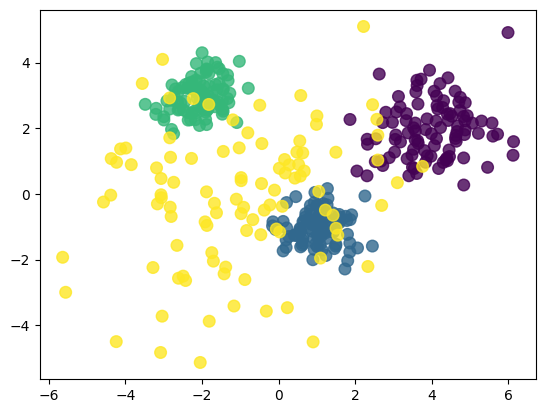

In [43]:
# Build a dataset with at least 4 classes in 2 dimensions, and plot it
# TODO: put your code here
X, Y = mixGauss(means=[[4, 2], [1, -1], [-2,3], [-1,-0]], sigmas=[1, 0.5, 0.5, 2], n=100, rng=rng)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8);

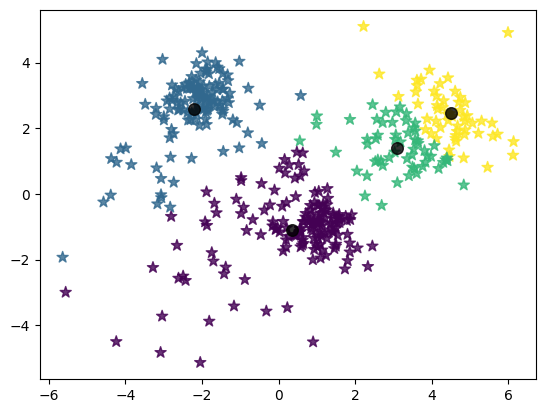

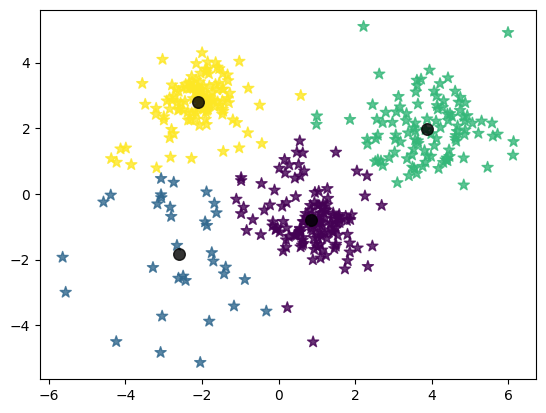

In [44]:
# Try with a random initialization of the centers.
# TODO: put your code here
k = 4
centers0 = rng.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))

# Call the lloyd function
# TODO: put your code here
Iv, centers = lloyd(X, centers0, max_iter=100)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8);

# NOTE: Try with different random seeds!
random_seed = 67

k = 4
centers0 = rng.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))

# Call the lloyd function
# TODO: put your code here
Iv, centers = lloyd(X, centers0, max_iter=100)

# Visualize the final clusters and their centroids
plt.show()
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8);

## Part 3. A Better Initialization Strategy: K-Means++

Initializing the cluster centers at random, sometimes makes the algorithm converge to a sub-optimal local minimum.

The k-means++ algorithm is an **initialization strategy** to generate the initial centers, which can then be passed to the lloyd algorithm.

K-means++ works by selecting the cluster centers as the points within the dataset which have the **maximum distance** between each other. To do this it uses a greedy strategy implemented in the `kmeanspp` function below.

Take a look at the K-Means++ function and then use it as initialization for the K-means algorithm.

##### Your task:
You should take a dataset on which K-Means was struggling, and apply K-Means++ for the center initialization, trying to show that the new initialization strategy improves the clustering algorithm.

In [45]:
def kmeanspp(X, k, rng=None):
    rng = _check_random_generator(rng)

    n, d = X.shape

    # initialize centers array
    centers = np.empty((k, d), dtype=X.dtype)

    # 1. choose first center uniformly at random
    first_idx = rng.integers(n)
    centers[0] = X[first_idx]

    # 2. choose each subsequent center
    for i in range(1, k):
        # D has shape (i, n): distances from each existing center to each point
        D = all_distances(centers[:i], X)  # assume Euclidean distances
        # distance to closest center for each point
        Ds = np.min(D, axis=0)
        D2 = Ds ** 2

        # handle degenerate case: all distances zero
        total = np.sum(D2)
        if total == 0:
            # all points are identical to some center: pick uniformly at random
            newcpos = rng.integers(n)
        else:
            P = D2 / total
            # sample index according to probabilities P
            newcpos = rng.choice(n, p=P)

        centers[i] = X[newcpos]

    return centers

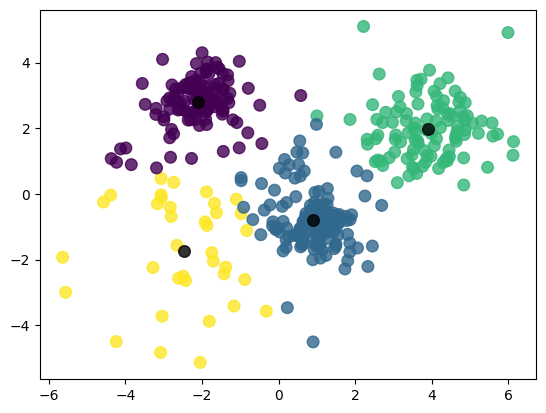

In [46]:
# Try and use K-Means++ for initialization
# TODO: put your code here
k = 4
centers0 = kmeanspp(X, k, rng=rng)

# Call the Lloyd function
# TODO: put your code here
Iv, centers = lloyd(X, centers0, max_iter=100)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8);

## How does the number of clusters affect k-means quality?

In this exercise your task is:

1. Run k-means clustering with different numbers of clusters (use k-means++ to initialize the centers)
2. Evaluate the quality of each clustering using `silhouette_score` from sklearn.
3. Plot silhouette score vs. number of clusters and interpret the results.

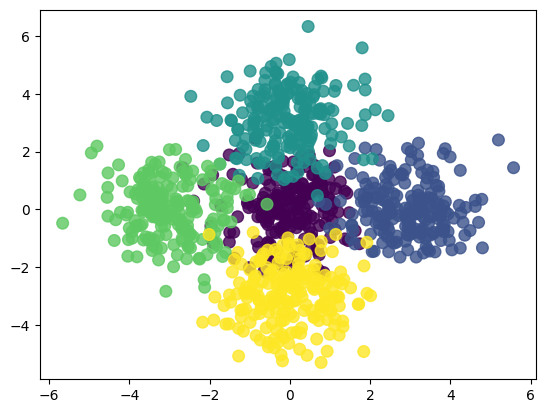

In [47]:
# generate datasets where clusters are not perfectly separated (small overlap between clusters)
means = np.array([
    [0.0, 0.0],
    [3.0, 0.0],
    [0.0, 3.0],
    [-3.0, 0.0],
    [0.0, -3.0],
])
sigmas = np.array([0.9, 0.9, 0.9, 0.9, 0.9])
X, Y = mixGauss(means, sigmas, n=200, rng=12)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8);

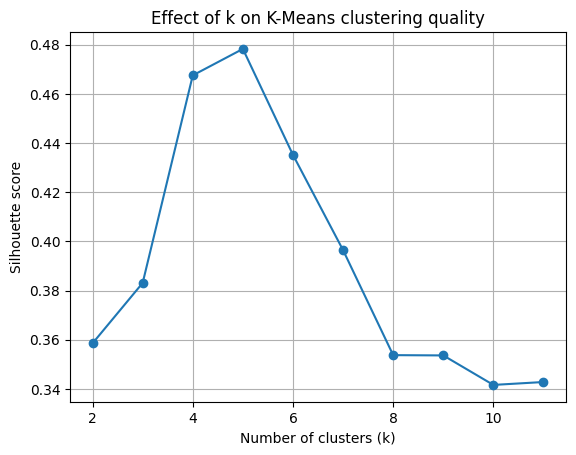

In [49]:
from sklearn.metrics import silhouette_score

k_list = list(range(2, 12))
sil_scores = []
for k in k_list:
        # 1) Initialize centers with kmeans++
        # TODO: put your code here
        centers_init = kmeanspp(X, k, rng=rng)

        # 2) Run Lloyd's algorithm starting from these centers
        # TODO: put your code here
        labels, centers = lloyd(X, centers_init, max_iter=100)

        # 3) Compute silhouette score
        # TODO: put your code here, check `silhouette_score` documentation to learn more
        score = silhouette_score(X, labels)
        sil_scores.append(score)

# Plot silhouette score vs k
plt.figure()
plt.plot(k_list, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Effect of k on K-Means clustering quality")
plt.grid(True)
plt.show()